# Описание задачи

Задача: выявить регионы мира, в которых Алго лучше всего начинает работу. 

Период начала работы посмотрим для 1 и 3 месяцев.
"Лучше всего" определим как регионы с наибольшим средним количеством уникальных студентов и наибольшим средним количеством проведенных уроков.

Датасет был выгружен в .csv из googlesheets. В рамках задачи создадим pandas датасет, распределим страны по регионам мира и визуализируем регионы по убыванию выбранных метрик.

In [1]:
# импорт библиотек

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# создание датафрейма

df = pd.read_csv('partners.csv')
df.head()

,Month,Country,Unique students,Lessons
0,01.01.2022,Albania,28,149
1,01.02.2022,Albania,36,161
2,01.03.2022,Albania,24,158
3,01.04.2022,Albania,16,88
4,01.05.2022,Albania,26,90


In [3]:
# приведение столбцов к единому виду

df.columns = df.columns.str.lower()
df = df.rename(columns={'unique students':'unique_students'})
df.head()

,month,country,unique_students,lessons
0,01.01.2022,Albania,28,149
1,01.02.2022,Albania,36,161
2,01.03.2022,Albania,24,158
3,01.04.2022,Albania,16,88
4,01.05.2022,Albania,26,90


In [21]:
# информация о датасете

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 957 entries, 0 to 956
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   month            957 non-null    datetime64[ns]
 1   country          957 non-null    object        
 2   unique_students  957 non-null    int64         
 3   lessons          957 non-null    int64         
 4   region           957 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 44.9+ KB


In [5]:
# приведение даты к нужному виду

df['month'] = pd.to_datetime(df['month'])

In [6]:
# список уникальных стран

df['country'].unique()

array(['Albania', 'Argentina', 'Australia', 'Bahrain', 'Bolivia',
       'Bulgaria', 'Cambodia', 'Cameroon', 'Canada', 'Chile', 'Colombia',
       'Costa Rica', 'Croatia', 'Ecuador', 'El Salvador', 'Estonia',
       'France', 'Germany', 'Guatemala', 'Honduras', 'Hungary', 'India',
       'Ireland', 'Italy', 'Jamaica', 'Jordan', 'Kenya', 'Kosovo',
       'Kuwait', 'Lithuania', 'Luxembourg', 'Malaysia', 'Maldives',
       'Mauritius', 'Mongolia', 'Montenegro', 'Morocco', 'Myanmar',
       'Nicaragua', 'Nigeria', 'Norway', 'Panama', 'Papua New Guinea',
       'Peru', 'Philippines', 'Portugal', 'Puerto Rico', 'Serbia',
       'Singapore', 'South\xa0Africa', 'South Africa', 'Spain',
       'Sri Lanka', 'Switzerland', 'Tajikistan', 'Turkey',
       'United Arab Emirates', 'United Kingdom', 'USA', 'Venezuela',
       'Zambia'], dtype=object)

In [7]:
# правим название South Africa и проверяем

df['country'] = df['country'].replace({'South\xa0Africa': 'South Africa'})
df['country'].unique()

array(['Albania', 'Argentina', 'Australia', 'Bahrain', 'Bolivia',
       'Bulgaria', 'Cambodia', 'Cameroon', 'Canada', 'Chile', 'Colombia',
       'Costa Rica', 'Croatia', 'Ecuador', 'El Salvador', 'Estonia',
       'France', 'Germany', 'Guatemala', 'Honduras', 'Hungary', 'India',
       'Ireland', 'Italy', 'Jamaica', 'Jordan', 'Kenya', 'Kosovo',
       'Kuwait', 'Lithuania', 'Luxembourg', 'Malaysia', 'Maldives',
       'Mauritius', 'Mongolia', 'Montenegro', 'Morocco', 'Myanmar',
       'Nicaragua', 'Nigeria', 'Norway', 'Panama', 'Papua New Guinea',
       'Peru', 'Philippines', 'Portugal', 'Puerto Rico', 'Serbia',
       'Singapore', 'South Africa', 'Spain', 'Sri Lanka', 'Switzerland',
       'Tajikistan', 'Turkey', 'United Arab Emirates', 'United Kingdom',
       'USA', 'Venezuela', 'Zambia'], dtype=object)

In [8]:
# словарь, в котором соотносим страны с регионами мира

region_mapping = {
    'Albania': 'Europe', 'Argentina': 'South America', 'Armenia': 'Asia', 'Australia': 'Oceania', 
    'Austria': 'Europe', 'Azerbaijan': 'Asia', 'Bahrain': 'Middle East', 'Bangladesh': 'Asia', 
    'Belarus': 'Europe', 'Belgium': 'Europe', 'Bolivia': 'South America', 'Bulgaria': 'Europe', 
    'Cambodia': 'Asia', 'Cameroon': 'Africa', 'Canada': 'North America', 'Chile': 'South America', 
    'Colombia': 'South America', 'Costa Rica': 'Central America', 'Croatia': 'Europe', 
    'Ecuador': 'South America', 'El Salvador': 'Central America', 'Estonia': 'Europe', 
    'France': 'Europe', 'Germany': 'Europe', 'Guatemala': 'Central America', 'Honduras': 'Central America', 
    'Hungary': 'Europe', 'India': 'Asia', 'Ireland': 'Europe', 'Italy': 'Europe', 'Jamaica': 'North America', 
    'Jordan': 'Middle East', 'Kenya': 'Africa', 'Kosovo': 'Europe', 'Kuwait': 'Middle East', 
    'Lithuania': 'Europe', 'Luxembourg': 'Europe', 'Malaysia': 'Asia', 'Maldives': 'Asia', 
    'Mauritius': 'Africa', 'Mongolia': 'Asia', 'Montenegro': 'Europe', 'Morocco': 'Africa', 
    'Myanmar': 'Asia', 'Nicaragua': 'Central America', 'Nigeria': 'Africa', 'Norway': 'Europe', 
    'Panama': 'Central America', 'Papua New Guinea': 'Oceania', 'Peru': 'South America', 
    'Philippines': 'Asia', 'Portugal': 'Europe', 'Puerto Rico': 'North America', 'Serbia': 'Europe', 
    'Singapore': 'Asia', 'South Africa': 'Africa', 'Spain': 'Europe', 'Sri Lanka': 'Asia', 
    'Switzerland': 'Europe', 'Tajikistan': 'Asia', 'Turkey': 'Europe', 'United Arab Emirates': 'Middle East', 
    'United Kingdom': 'Europe', 'USA': 'North America', 'Venezuela': 'South America', 'Zambia': 'Africa'
}

In [9]:
# применяем к столбцу со странами

df['region'] = df['country'].map(region_mapping)
df['region']

0      Europe
1      Europe
2      Europe
3      Europe
4      Europe
        ...  
952    Africa
953    Africa
954    Africa
955    Africa
956    Africa
Name: region, Length: 957, dtype: object

In [10]:
# сортируем по стране и месяцу

df = df.sort_values(by=['country', 'month'])

In [11]:
# выделяем страны на периоде 3 мес

period_3_months = df.groupby('country').head(3)
period_3_months

,month,country,unique_students,lessons,region
0,2022-01-01,Albania,28,149,Europe
1,2022-01-02,Albania,36,161,Europe
2,2022-01-03,Albania,24,158,Europe
24,2023-01-08,Argentina,2,4,South America
25,2023-01-09,Argentina,3,15,South America
...,...,...,...,...,...
925,2023-01-05,Venezuela,44,154,South America
926,2023-01-06,Venezuela,25,72,South America
933,2022-01-01,Zambia,14,28,Africa
934,2022-01-02,Zambia,22,99,Africa


In [13]:
# выделяем регионы на периоде 3 мес

regions_3_months = (
    period_3_months.groupby('region')[['unique_students', 'lessons']]
    .agg('mean')
    .round(2)
    .reset_index()
    .sort_values(by=['unique_students', 'lessons'], ascending=False)
)

regions_3_months

,region,unique_students,lessons
2,Central America,86.50,248.17
1,Asia,62.47,225.73
3,Europe,59.43,194.83
4,Middle East,36.00,165.50
5,North America,35.70,113.10
0,Africa,31.67,80.00
7,South America,23.80,72.50
6,Oceania,21.00,109.00


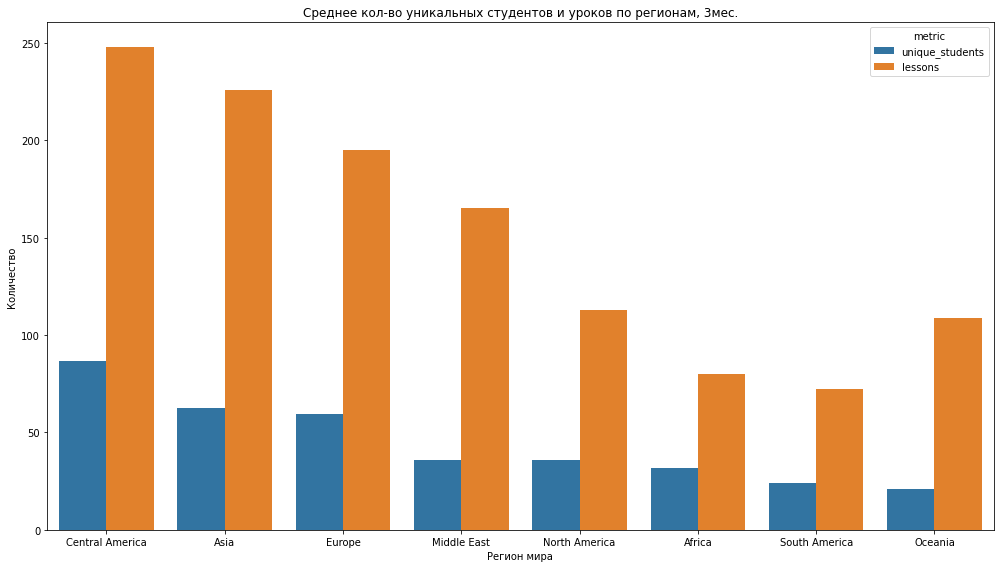

In [14]:
# подготовка таблицы для визуализации
melted_regions_3m = regions_3_months.melt(id_vars='region', var_name='metric', value_name='average')

# регионы мира с лучшим перформансом на периоде 3 мес
plt.figure(figsize=(14, 8))

sns.barplot(x='region', y='average', hue='metric', data=melted_regions_3m)
plt.xlabel('Регион мира')
plt.ylabel('Количество')
plt.title('Среднее кол-во уникальных студентов и уроков по регионам, 3мес.')
plt.tight_layout()
plt.show()

In [16]:
# выделяем страны на периоде 1 мес

period_1_month = df.groupby('country').head(1)

In [19]:
# выделяем регионы на периоде 1 мес

regions_1_month = (
    period_1_month.groupby('region')[['unique_students', 'lessons']]
    .agg('median')
    .round(2)
    .reset_index()
    .sort_values(by=['unique_students', 'lessons'], ascending=False)
)

regions_1_month

,region,unique_students,lessons
2,Central America,73.5,198.5
1,Asia,42.5,114.5
3,Europe,38.5,76.0
4,Middle East,24.0,130.0
5,North America,18.5,63.5
0,Africa,18.0,28.0
6,Oceania,16.5,89.5
7,South America,11.0,68.0


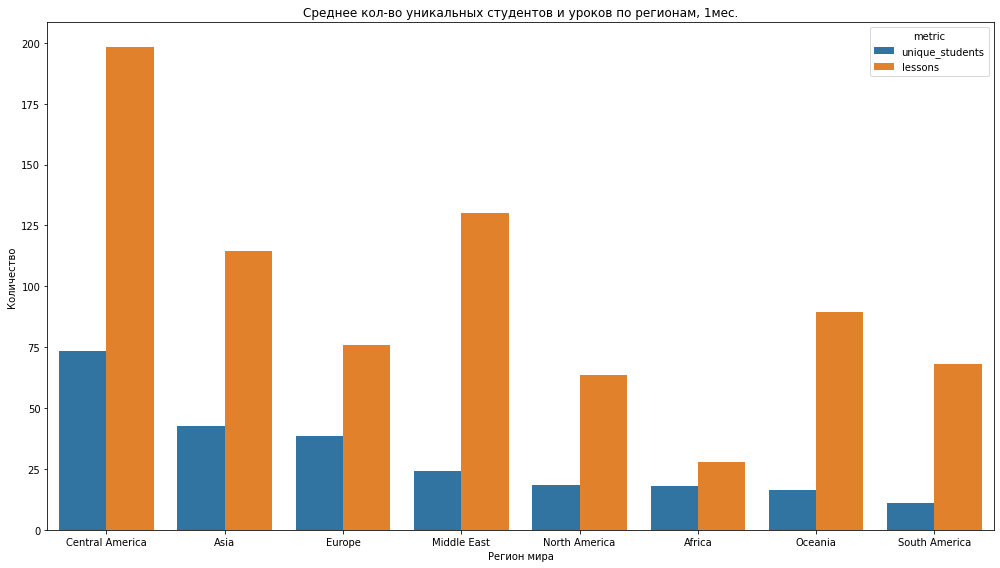

In [20]:
# визуализируем регионы на периоде 1 мес

melted_regions_1m = regions_1_month.melt(id_vars='region', var_name='metric', value_name='average')

plt.figure(figsize=(14, 8))

sns.barplot(x='region', y='average', hue='metric', data=melted_regions_1m)
plt.xlabel('Регион мира')
plt.ylabel('Количество')
plt.title('Среднее кол-во уникальных студентов и уроков по регионам, 1мес.')
plt.tight_layout()
plt.show()

# Вывод: 

Видим,что для обоих рассмотренных периодов Топ-3 регионов одинаковый:

1 - Центральная Америка

2 - Азия

3 - Европа